In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import unique
from numpy import where

**untuk kmeans clustreing method**

In [217]:
from matplotlib import style
style.use("ggplot")
df = pd.read_csv("seed_dataset.csv",sep=",",
                usecols=["AREA","PERIMETER","COMPACTNESS","LENGTH","WIDTH","ASYMMETRY","LKG","CLS"])


In [211]:
df.head()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASYMMETRY,LKG,CLS
0,15.26,14.84,871.000,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,8.811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,905.000,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,8.955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,9.034,5.658,3.562,1.355,5.175,1.0


In [192]:
df_x = df.iloc[:, 0:2] #mengambil dua atribut
df_x.head() 


,AREA,PERIMETER
0,15.26,14.84
1,14.88,14.57
2,14.29,14.09
3,13.84,13.94
4,16.14,14.99


In [193]:
x_array = np.array(df_x)#menjadi array

In [219]:
print(x_array)

[[15.26 14.84]
 [14.88 14.57]
 [14.29 14.09]
 [13.84 13.94]
 [16.14 14.99]
 [14.38 14.21]
 [14.69 14.49]
 [14.11 14.1 ]
 [16.63 15.46]
 [16.44 15.25]
 [15.26 14.85]
 [14.03 14.16]
 [13.89 14.02]
 [13.78 14.06]
 [13.74 14.05]
 [14.59 14.28]
 [13.99 13.83]
 [15.69 14.75]
 [14.7  14.21]
 [12.72 13.57]
 [14.16 14.4 ]
 [14.11 14.26]
 [15.88 14.9 ]
 [12.08 13.23]
 [15.01 14.76]
 [16.19 15.16]
 [13.02 13.76]
 [12.74 13.67]
 [14.11 14.18]
 [13.45 14.02]
 [13.16 13.82]
 [15.49 14.94]
 [14.09 14.41]
 [13.94 14.17]
 [15.05 14.68]
 [16.12 15.  ]
 [16.2  15.27]
 [17.08 15.38]
 [14.8  14.52]
 [14.28 14.17]
 [13.54 13.85]
 [13.5  13.85]
 [13.16 13.55]
 [15.5  14.86]
 [15.11 14.54]
 [13.8  14.04]
 [15.36 14.76]
 [14.99 14.56]
 [14.79 14.52]
 [14.86 14.67]
 [14.43 14.4 ]
 [15.78 14.91]
 [14.49 14.61]
 [14.33 14.28]
 [14.52 14.6 ]
 [15.03 14.77]
 [14.46 14.35]
 [14.92 14.43]
 [15.38 14.77]
 [12.11 13.47]
 [11.42 12.86]
 [11.23 12.63]
 [12.36 13.19]
 [13.22 13.84]
 [12.78 13.57]
 [12.88 13.5 ]
 [14.34 14

In [195]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_array)
df["kluster"] = kmeans.labels_

In [221]:
centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

In [223]:
print(centroids)

[[11.83893333 13.22053333]
 [16.27763158 15.23868421]
 [19.15104167 16.46916667]
 [14.1277551  14.21061224]]


cara satu untuk memvisualisasikan data

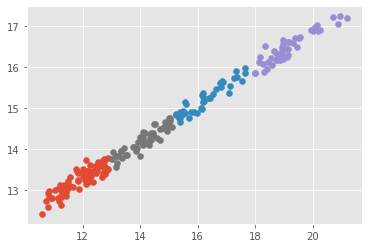

In [224]:

yhat = kmeans.predict(x_array)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(x_array[row_ix, 0], x_array[row_ix, 1])
# show the plot
pyplot.show()

cara dua unyuk memvisualisasikan data

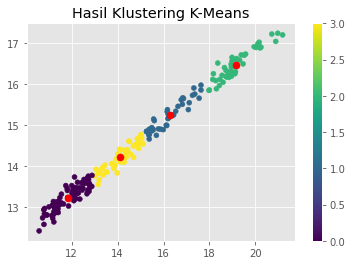

In [199]:
output = plt.scatter(x_array[:,0],x_array[:,1],s=100, c=df.kluster, marker=".", alpha =1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c="red", s=200, alpha=1,marker=".")
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()


**dengan metode meanShift**

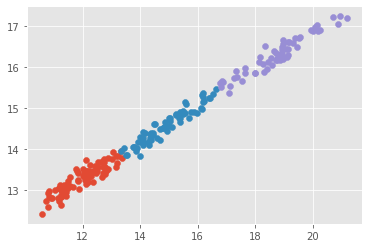

In [200]:
#cara satu
from sklearn.cluster import MeanShift
# define the model
modelshift = MeanShift()
# fit model and predict clusters
yhat = modelshift.fit_predict(x_array)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(x_array[row_ix, 0], x_array[row_ix, 1])
# show the plot
pyplot.show()

In [225]:
centroids = modelshift.cluster_centers_

In [226]:
print(centroids)

[[12.11461538 13.33593407]
 [14.60333333 14.43861111]
 [18.77215686 16.31823529]]


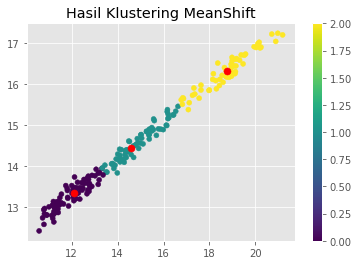

In [206]:
#cara dua
output = plt.scatter(x_array[:,0],x_array[:,1],s=100, c=modelshift.labels_, marker=".", alpha =1, )
centers = modelshift.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c="red", s=200, alpha=1,marker=".")
plt.title("Hasil Klustering MeanShift")
plt.colorbar(output)
plt.show()

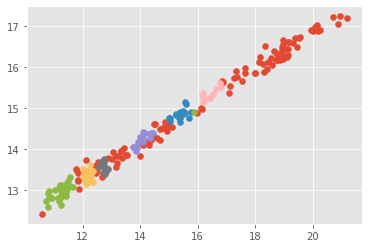

In [202]:
# optics clustering
from sklearn.cluster import OPTICS
X = x_array
# define the model
modeloptic = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = modeloptic.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

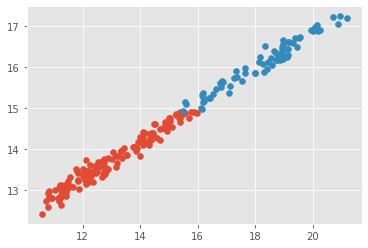

In [203]:
# gaussian mixture clustering
from sklearn.mixture import GaussianMixture
X = x_array
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()